In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

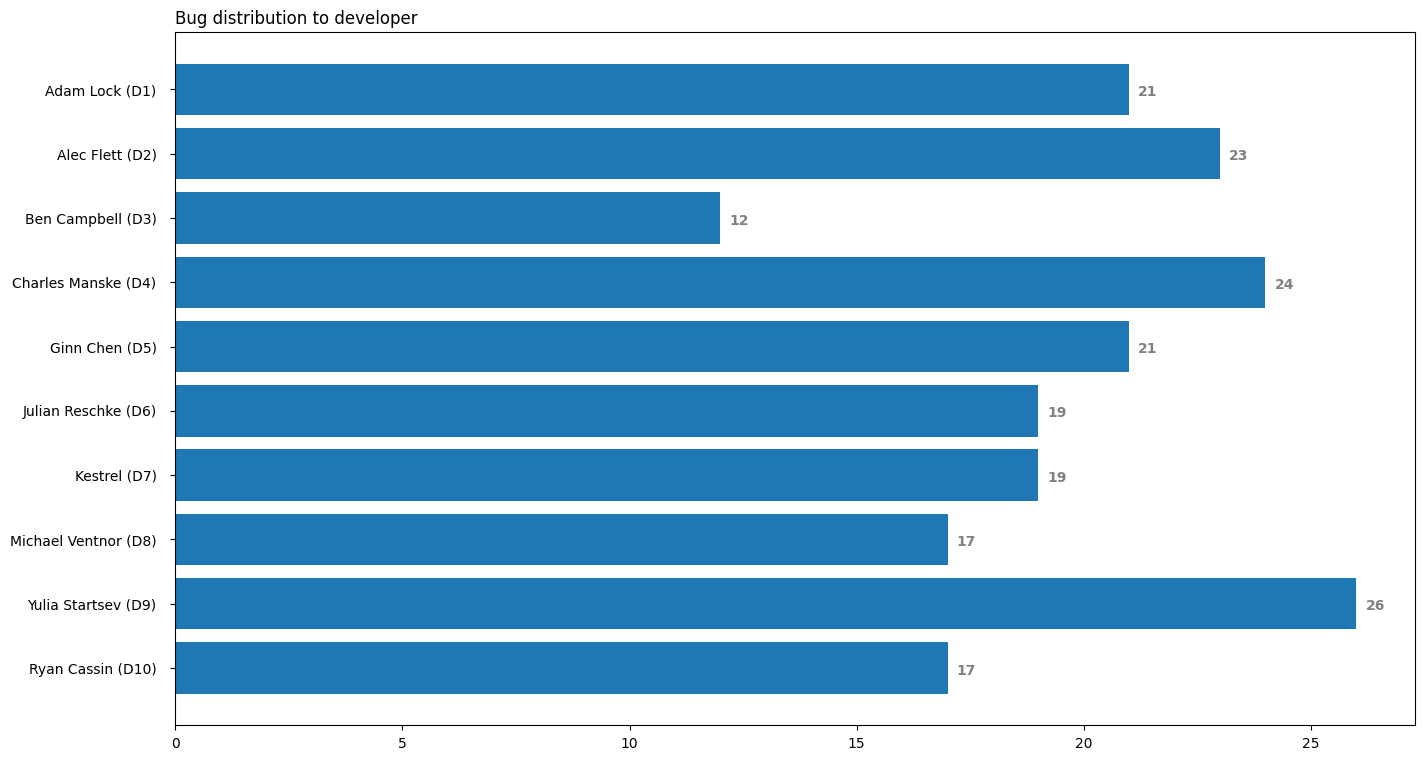

In [32]:
data = pd.read_csv(r"mozilla_graph.csv")
data.head()
df = pd.DataFrame(data)
 
name = df['Developers'].head(10)
price = df['tot bugs asgn'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)

# # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Bug distribution to developer',
             loc ='left', )
plt.show()

In [33]:
ahp_df = pd.read_csv('mozilla_preprocessed_comparision_matrix.csv')
ahp_df

,Experience,Total Bugs Assigned,New Bugs,Total Fixed Bugs,Average Fixing Time(days)
0,1.000000,5.000000,4.000000,6.0,7
1,0.200000,1.000000,5.000000,4.0,6
2,0.250000,0.200000,1.000000,7.0,5
3,0.166667,0.250000,0.142857,1.0,5
4,0.142857,0.166667,0.200000,0.2,1


In [34]:
def weight_calculation(ahp_df):
    sum_attr=np.array(ahp_df.sum(numeric_only=True))
    #print('sum_attr',sum_attr)
    cell_by_sum = ahp_df.div(sum_attr,axis=1)
    #print(cell_by_sum)
    priority_df = pd.DataFrame(cell_by_sum.mean(axis=1),
                               index=ahp_df.index,columns=['Weight/Priority'])
    #print(priority_df)
    priority_df = priority_df.transpose()
    return priority_df
    
priority_attr=weight_calculation(ahp_df)
priority_attr

,0,1,2,3,4
Weight/Priority,0.466416,0.243601,0.172389,0.081919,0.035674


In [35]:
def consistency_ratio(priority_index,ahp_df):
    random_matrix = {1:0,2:0,3:0.58,4:0.9,5:1.12,6:1.24,7:1.32,
                     8:1.14,9:1.45,10:1.49,11:1.51,12:1.48,13:1.56,
                     14:1.57,15:1.59,16:1.605,17:1.61,18:1.615,19:1.62,20:1.625}
    # Check for consistency
    consistency_df = ahp_df.multiply(np.array(priority_index.loc['Weight/Priority']),axis=1)
    consistency_df['sum_of_col'] = consistency_df.sum(axis=1)
    # To find lambda max
    lambda_max_df = consistency_df['sum_of_col'].div(np.array(priority_index.transpose()
                                                              ['Weight/Priority']),axis=0)
    lambda_max = lambda_max_df.mean()
    # To find the consistency index
    consistency_index = round((lambda_max-len(ahp_df.index))/(len(ahp_df.index)-1),3)
    print(f'The Consistency Index is: {consistency_index}')
    # To find the consistency ratio
    consistency_ratio = round(consistency_index/random_matrix[len(ahp_df.index)],3)
    print(f'The Consistency Ratio is: {consistency_ratio}')
    if consistency_ratio<0.1:
        print('The model is consistent')
    else:
        print('The model is not consistent')
#print(ahp_df.columns)        
consistency_ratio(priority_attr,ahp_df)

The Consistency Index is: 0.287
The Consistency Ratio is: 0.256
The model is not consistent


In [36]:
ahp_df_1 = pd.read_csv('mozilla_criteria_comparision_matrix.csv',header=[0], index_col=[0,1]) 
ahp_df_1

D1        D2        D3  \
CRITERIA                  DEVELOPER NAMES                                 
Experience                D1               1.000000  0.200000  0.250000   
                          D2               5.000000  1.000000  4.000000   
                          D3               4.000000  0.250000  1.000000   
                          D4               4.000000  0.333333  1.000000   
                          D5               0.500000  0.200000  0.200000   
                          D6               3.000000  0.200000  0.333333   
                          D7               3.000000  0.200000  0.333333   
                          D8               4.000000  0.250000  0.500000   
                          D9               0.500000  0.200000  0.200000   
                          D10              0.333333  0.200000  0.200000   
Total Bugs Assigned       D1               1.000000  0.500000  5.000000   
                          D2               2.000000  1.000000  5.000000   
                          D3               0.200000  0.200000  1.000000   
                          D4               3.000000  2.000000  5.000000   
                          D5               1.000000  0.333333  5.000000   
                          D6               0.333333  0.333333  4.000000   
                          D7               0.333333  0.333333  4.000000   
                          D8               0.250000  0.250000  3.000000   
                          D9               3.000000  2.000000  5.000000   
                          D10              0.250000  0.250000  3.000000   
New Bugs                  D1               1.000000  0.200000  2.000000   
                          D2               5.000000  1.000000  5.000000   
                          D3               0.500000  0.200000  1.000000   
                          D4               4.000000  0.500000  5.000000   
                          D5               3.000000  0.250000  3.000000   
                          D6               4.000000  0.333333  4.000000   
                          D7               4.000000  0.333333  4.000000   
                          D8               1.000000  0.200000  0.500000   
                          D9               5.000000  2.000000  5.000000   
                          D10              0.333333  0.250000  3.000000   
Total Fixed Bugs          D1               1.000000  3.000000  5.000000   
                          D2               0.333333  1.000000  2.000000   
                          D3               0.200000  0.500000  1.000000   
                          D4               0.333333  2.000000  4.000000   
                          D5               0.500000  2.000000  4.000000   
                          D6               0.333333  1.000000  3.000000   
                          D7               0.250000  0.500000  3.000000   
                          D8               0.333333  0.500000  4.000000   
                          D9               0.333333  1.000000  3.000000   
                          D10              0.333333  1.000000  3.000000   
Average Fixing Time(days) D1               1.000000  0.250000  0.250000   
                          D2               4.000000  1.000000  2.000000   
                          D3               4.000000  0.500000  1.000000   
                          D4               0.200000  0.200000  0.142857   
                          D5               0.166667  0.142857  0.142857   
                          D6               6.000000  5.000000  5.000000   
                          D7               7.000000  6.000000  6.000000   
                          D8               5.000000  5.000000  5.000000   
                          D9               7.000000  6.000000  6.000000   
                          D10              4.000000  0.500000  0.500000   

                                                 D4        D5        D6  \
CRITERIA                  DEVELOPER NAMES                                

In [37]:
def car_priority_index(car_attr_df,num_attr,attr_name):
    data_dict = {}
    data_dict[f"ahp_df_car_{attr_name}"] = car_attr_df.loc[attr_name]
    #print(data_dict)
    data_dict[f"sum_array_car_{attr_name}"] = np.array(data_dict[
        f"ahp_df_car_{attr_name}"].sum(numeric_only=True))
    #print(data_dict)
    data_dict[f"norm_mat_car_{attr_name}"] = data_dict[
        f"ahp_df_car_{attr_name}"].div(data_dict[f"sum_array_car_{attr_name}"],axis=1)
    #print(data_dict)
    priority_df = pd.DataFrame(data_dict[
        f"norm_mat_car_{attr_name}"].mean(axis=1),
                               index=car_attr_df.loc[attr_name].index,columns=[attr_name])
    #print(priority_df)
    return priority_df
car_price_df = car_priority_index(ahp_df_1,5,'Experience')
car_mileage_df = car_priority_index(ahp_df_1,5,'Total Bugs Assigned')
car_safety_df = car_priority_index(ahp_df_1,5,'New Bugs')
car_horsepower_df = car_priority_index(ahp_df_1,5,'Total Fixed Bugs')
car_comfort_df = car_priority_index(ahp_df_1,5,'Average Fixing Time(days)')

car_df = pd.concat([car_price_df,car_mileage_df,car_safety_df,
                      car_horsepower_df,car_comfort_df],axis=1)
car_norm_df = car_df.multiply(np.array(priority_attr.loc['Weight/Priority']),axis=1)
car_norm_df['Sum'] = car_norm_df.sum(axis=1)
car_norm_df['Rank'] = car_norm_df['Sum'].rank(ascending=False).astype(int)
car_norm_df

,Experience,Total Bugs Assigned,New Bugs,Total Fixed Bugs,Average Fixing Time(days),Sum,Rank
DEVELOPER NAMES,,,,,,,
D1,0.021000,0.027262,0.007365,0.019344,0.001346,0.076318,7
D2,0.134069,0.036537,0.033213,0.006867,0.002290,0.212975,1
D3,0.070560,0.005480,0.005322,0.002409,0.002170,0.085941,4
D4,0.071841,0.046439,0.028454,0.010138,0.002585,0.159457,2
D5,0.017674,0.026644,0.014775,0.012464,0.002559,0.074115,8
D6,0.029796,0.013751,0.015307,0.006120,0.004831,0.069804,9
D7,0.037815,0.013751,0.013633,0.005712,0.008138,0.079048,6
D8,0.056656,0.010507,0.006037,0.008043,0.003661,0.084904,5
D9,0.016250,0.054238,0.041781,0.005411,0.004708,0.122389,3
